# Machine Learning

## 3️⃣ Regression Analysis

### What is Regressian Analysis?

Algorithm that finds **a model that best describes data** and predicts future result values according to input values.

- example
    - **Input Data**   
    $X$: Average Temparature, $Y$: Ice cream sales volume
    
    - **Assumption**   
    $Y {\approx} {\beta}_0 + {\beta}_1X$ -> Let's find **proper ${\beta}_0$ and ${\beta}_1$!**

### Simple Regression Analysis

Assume that a model describing data is in **a straight line**.

#### Using *OLS(Ordinary Least Squares)* to evaluate model

Define **the sum of the squares of the difference between the actual and predicted values** as the Loss function.

Loss function: $\frac{1}{N}\sum_{i = 1}^N \left( Y_i - {\beta}_0 - {\beta}_1 X_i \right)^2$

The smaller the value of the Loss function, the better the model. So, let's find ways to minimalize the value of the Loss function.

#### Gradient descent

Let's say that the two values that make the value of the Loss function smallest are ${\beta}^*_0$ and ${\beta}^*_1$.

**Gradient descent** is not a single calculation of beta0 and beta1, but a gradual calculation from the initial value.

How Gradient descent works:
1. Initialize ${\beta}_0$ and ${\beta}_1$ to random value
2. Get the value of Loss function using current value of ${\beta}_0$ and ${\beta}_1$
3. Calculate **Gradient value** that lets you know how you should change the value of ${\beta}_0$ and ${\beta}_1$ to make the value of loss function smaller
4. Update ${\beta}_0$ and ${\beta}_1$ using the Gradient value.
5. Repeat 2~4 until the value of loss function changes no more.


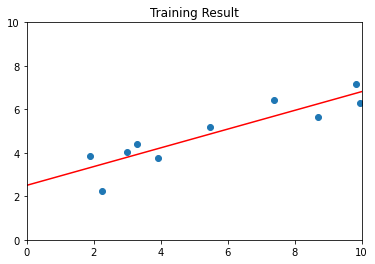

Predicted value for train_X : 
[6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749]

Actual value : 
0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# You can easily get the model that minimalizes the value of Loss function using scikit-learn library.
from sklearn.linear_model import LinearRegression

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = pd.DataFrame(X, columns=['X']) # Feature data must be of DataFrame type.
train_Y = pd.Series(Y) # Label data must be of Series type.

# Training Model
lrmodel = LinearRegression() # Initialize Model
lrmodel.fit(train_X, train_Y) # Learning is performed by inputting preprocessed data using fit(Feature, Label)

# Visualizing the result of learning
plt.scatter(X, Y) 
plt.plot([0, 10], [lrmodel.intercept_, 10 * lrmodel.coef_[0] + lrmodel.intercept_], c='r') 
plt.xlim(0, 10) 
plt.ylim(0, 10) 
plt.title('Training Result')
plt.show()


# Predicting Label data from train_X
pred_X = lrmodel.predict(train_X)
print('Predicted value for train_X : \n{}\n'.format(pred_X))
print('Actual value : \n{}'.format(train_Y))


#### The characteristics of simple regression analysis

- It can only be applied when there is one input value.
- Use it if you want to intuitively interpret the relationship between the two variables.

### Multiple Linear Regression

If you want to predict the result value with multiple inputs, use **multiple linear regression**.

$Y {\approx} {\beta}_0 + {\beta}_1X_1 + {\beta}_2X_2 + {\beta}_3X_3 + ... + {\beta}_MX_M$

**Loss function**, like a simple linear regression, is defined as the sum of the squares of the difference between the input value and the actual value.

$\frac{1}{N}\sum_{i = 1}^N \left( Y^i - ({\beta}_0 + {\beta}_1 X^i_1 + {\beta}_2 X^i_2 + ... + {\beta}_M X^i_M)\right)^2$

#### Gradient Descent

Let's use **gradient descent** to minimalize the value of Loss function as we did in simple linear regression.

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("./Advertising.csv")

print('Original Data :')
print(df.head(),'\n')

# Delete ['Unnamed: 0'] column which is not used as input value
df = df.drop(columns=['Unnamed: 0'])

"""
1. The sales variable, which is label data, is stored in Y and the rest in X.
"""
X = df.drop(columns=['Sales'])
Y = df['Sales']

"""
2. Split data into learning data and evaluation data.
"""
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print preprocessed data
print('train_X : ')
print(train_X.head(),'\n')
print('train_Y : ')
print(train_Y.head(),'\n')

print('test_X : ')
print(test_X.head(),'\n')
print('test_Y : ')
print(test_Y.head(), '\n')

"""
3. Initialize multiple linear regression model and perfomr model learning.
"""

lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

"""
4. Get model after learning
"""
beta_0 = lrmodel.intercept_ # y intercept (basic sales volume)
beta_1 = lrmodel.coef_[0] # coefficient for first variable (Radio)
beta_2 = lrmodel.coef_[1] # coefficient for second variable (TV)
beta_3 = lrmodel.coef_[2] # coefficient for third variable (Newspaper)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)
print("\n")

print('test_X : ')
print(test_X, "\n")

"""
5. Predict for test_X.
"""
pred_X = lrmodel.predict(test_X)
print('Predicted value for text_X : \n{}\n'.format(pred_X))

# Define new data, df1.
df1 = pd.DataFrame(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]), columns=['Radio', 'TV', 'Newspaper'])
print('df1 : ')
print(df1)

"""
6. Predict for df1.
"""
pred_df1 = lrmodel.predict(df1)
print('Predicted value for df1 : \n{}'.format(pred_df1))

Original Data :
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9 

train_X : 
        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6 

train_Y : 
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64 

test_X : 
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2 

test_Y : 
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64 

beta_0: 2.979067
beta_1: 0.044730
beta_2: 0.189195
beta_3: 0.002761


test_X : 
        TV  Radio  Newspaper
95   163.3   31.6      

#### The characteristics of simple regression analysis

- You can see how each input value affects the result value.
- If the **correlation** between multiple input values is high, there is a possibility of losing reliability in the result.

### Evaluating Regression Algorithm

#### RSS (Residual Sum of Squares)

- The sum of the squares of the error between the actual value and the predicted value.
- $RSS = \sum_{i = 1}^N \left( Y_i - {\beta}_0 - {\beta}_1 X_i \right)^2$
- Because the error is used as it is, it depends on the size of the input value.
- It is impossible to compare with the absolute value.

#### MSE (Mean Squared Error)

- RSS divided by the number of data.
- The smaller this value, the higher the performance of the model can be evaluated.
- $MSE = \frac{1}{N}\sum_{i = 1}^N \left( Y_i - {\beta}_0 - {\beta}_1 X_i \right)^2$
- In the case of the regression model, MSE is used as **loss function**.


#### MAE (Mean Absolute Error)

- $MSE = \frac{1}{N}\sum_{i = 1}^N \left|( Y_i - {\beta}_0 - {\beta}_1 X_i \right)|$

#### MSE vs MAE

- MSE: Sensitive to outliers.
- MAE: It is useful when predicting both high and low volatility indicators.
- Because the average is used as it is, it depends on the size of the input value.

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# get predicted value of train_X
pred_train = lrmodel.predict(train_X)

"""
1.calculate MSE, MAE of train_X
"""
MSE_train = mean_squared_error(train_Y, pred_train)
MAE_train = mean_absolute_error(train_Y, pred_train)
print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

# get predicted value of test_X
pred_test = lrmodel.predict(test_X)

"""
2. calculate MSE, MAE of test_X
"""
MSE_test = mean_squared_error(test_Y, pred_test)
MAE_test = mean_absolute_error(test_Y, pred_test)
print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_train : 2.705129
MAE_train : 1.198468
MSE_test : 3.174097
MAE_test : 1.460757


#### $R^2$ (coefficient of determination)

- $R^2 = 1 - \frac{RSS}{TSS}$

- $TSS = \sum_{i = 1}^N \left( y_i - \bar y \right)^2$, $\bar y = \frac{1}{N}\sum_{i = 1}^N y_i $

- $RSS = \sum_{i = 1}^N \left( y_i - {\beta}_0 - {\beta}_1 x_i \right)^2$
- $R^2$ has a value closer to 1 as there is no error.
- When $R^2$ is 0, it means that the model is a linear model that outputs an average value of data.


In [11]:
from sklearn.metrics import r2_score

# get predicted value of train_X
pred_train = lrmodel.predict(train_X)

"""
1.calculate R2 score of train_X
"""
R2_train = r2_score(train_Y, pred_train)
print('R2_train : %f' % R2_train)

# get predicted value of test_X
pred_test = lrmodel.predict(test_X)

"""
2. calculate R2 score of test_X
"""
R2_test = r2_score(test_Y, pred_test)
print('R2_test : %f' % R2_test)

R2_train : 0.895701
R2_test : 0.899438
